# Loading Libraries and Data

In [10]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ECD Data v3.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,country,year,Country,rain,temp,gdp,mortality,lifeexpectancy,disease,pop_sqr_km,...,democracy,pluralism,govt.functioning,participation,political.culture,CTL_C,soi,region_short,Latitude,Longitude
0,AD,1909,Andorra,661.9058,9.808048,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EURO,42.5,1.5
1,AD,1907,Andorra,886.1927,10.282322,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EURO,42.5,1.5
2,AD,1965,Andorra,868.9901,10.653588,NaN,NaN,NaN,NaN,39.465957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EURO,42.5,1.5
3,AD,1966,Andorra,794.9876,11.246102,NaN,NaN,NaN,NaN,41.802128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EURO,42.5,1.5
4,AD,1930,Andorra,1005.6397,11.161795,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EURO,42.5,1.5


# Basic Information about the Dataset

In [13]:
# Display basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23377 entries, 0 to 23376
Columns: 186 entries, country to Longitude
dtypes: float64(182), int64(1), object(3)
memory usage: 33.2+ MB


# Summary Statistics

In [16]:
# Display summary statistics
data.describe().T


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,count,mean,std,min,25%,50%,75%,max
year,23377.0,1961.426402,34.580008,1901.000000,1932.000000,1962.000000,1991.000000,2020.000000
rain,21692.0,1204.674360,875.416429,3.492440,532.227115,1005.355050,1733.468703,4999.686400
temp,21808.0,18.906061,8.287319,-8.951066,11.034035,22.727787,25.468260,29.695133
gdp,9367.0,7579.715618,14882.227391,34.790581,513.145351,1760.305423,7210.439195,189422.218800
mortality,2853.0,16053.193831,37215.456705,3.000000,1258.000000,3721.000000,13628.000000,368365.000000
...,...,...,...,...,...,...,...,...
political.culture,19652.0,5.587988,1.673628,1.250000,4.380000,5.630000,6.250000,10.000000
CTL_C,7800.0,53.267692,26.188176,0.000000,35.900000,55.200000,67.800000,119.800000
soi,5651.0,35.549796,7.031457,19.220000,32.160000,36.060000,39.950000,50.500000
Latitude,23377.0,18.688953,23.745100,-41.000000,4.000000,16.000000,39.500000,65.000000


# Checking for Missing Values

In [19]:
# Checking for missing values across columns
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]  # Display only columns with missing values
missing_data


National.Pride         20857
mortality              20524
Mort.MAPE              20191
Mort.MASE              20162
Mort.acf               20072
                       ...  
civil.liberties          954
Globalisation.Index      823
Religion.Fract           600
prejudice                392
Country                   30
Length: 181, dtype: int64

# Distribution of Categorical Variables

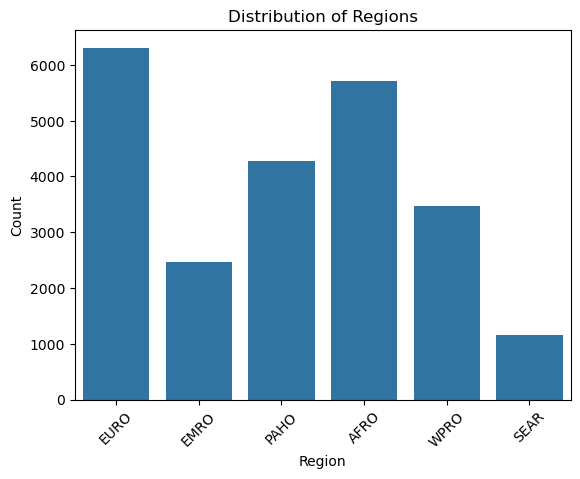

In [22]:
# Plotting the distribution of categorical variables (e.g., region_short)
sns.countplot(data=data, x='region_short')
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Time-Series Analysis of Selected Ecological Variables

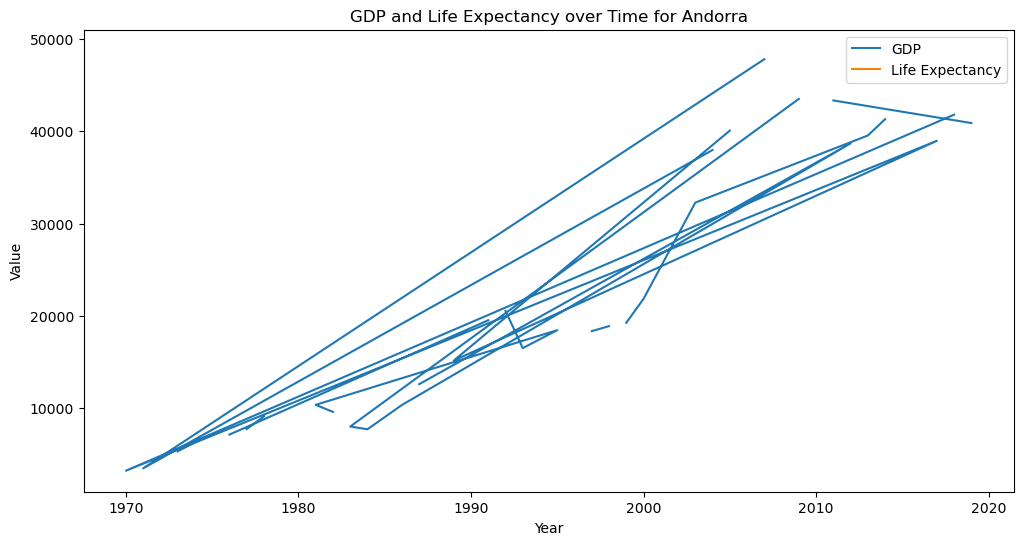

In [29]:
# Plotting GDP and life expectancy over time for a specific country, e.g., 'Andorra'
country_data = data[data['Country'] == 'Andorra']

plt.figure(figsize=(12, 6))
plt.plot(country_data['year'], country_data['gdp'], label='GDP')
plt.plot(country_data['year'], country_data['lifeexpectancy'], label='Life Expectancy')
plt.title('GDP and Life Expectancy over Time for Andorra')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


# Correlation Analysis

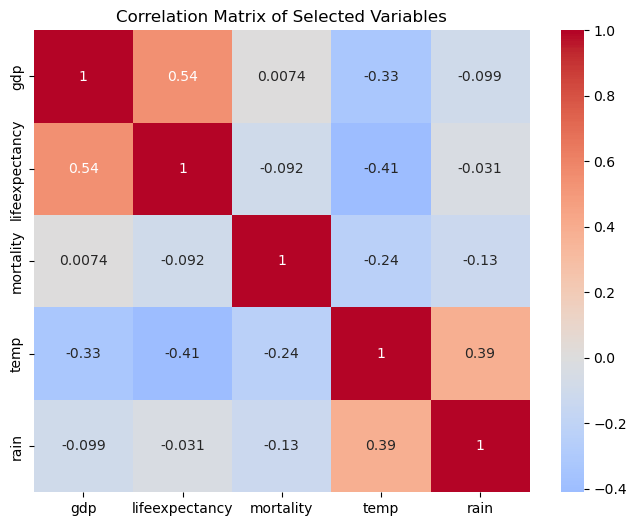

In [32]:
# Checking correlations between selected numerical columns
selected_columns = ['gdp', 'lifeexpectancy', 'mortality', 'temp', 'rain']
correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Variables')
plt.show()


# Distribution Plots for Numerical Variables

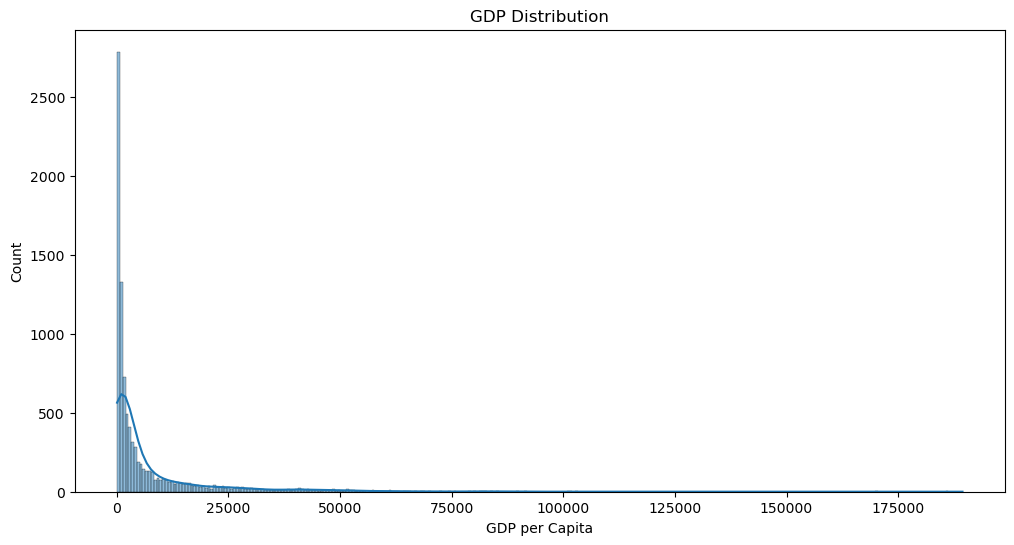

In [35]:
# Distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data['gdp'].dropna(), kde=True)
plt.title('GDP Distribution')
plt.xlabel('GDP per Capita')
plt.show()


# Geographical Analysis of Variables

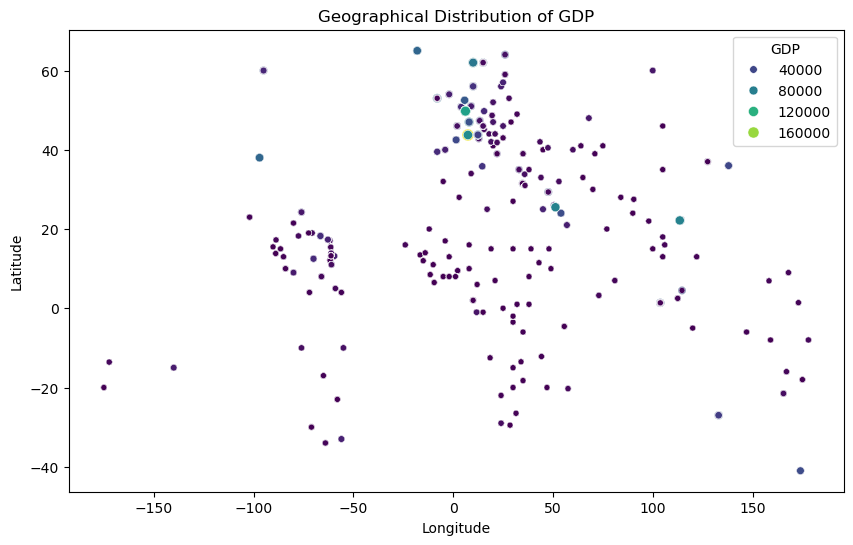

In [38]:
# Plotting GDP distribution across different latitudes (as a proxy for countries)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Longitude', y='Latitude', size='gdp', hue='gdp', palette='viridis')
plt.title('Geographical Distribution of GDP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='GDP')
plt.show()
